## Chp01-3. knn으로 도미와 빙어 구분하기 

In [1]:
## 35마리의 도미(bream)와 14마리의 빙어(smelt) 데이터 

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

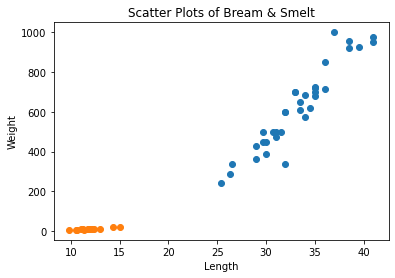

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.title('Scatter Plots of Bream & Smelt')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [3]:
## 도미, 방어 데이터를 2컬럼(lenght, weight)을 가진 행렬로 변환 
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [
    [l, w] for l, w in zip(length, weight)    
]

fish_data[:10]

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0]]

In [4]:
## give the target data 
## 도미 : 35개 = 1, 빙어 : 14개 = 0 

fish_target = [1]*35 + [0]*14
fish_target[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [5]:
## 사이킷런에서 KNN 불러오기 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [6]:
## model train : model.fit()
## model validation : model.score()
## predict the value with model : model.predict()

In [7]:
model.fit(fish_data, fish_target)

KNeighborsClassifier()

In [8]:
model.score(fish_data, fish_target)

1.0

In [9]:
new_fish = [30, 600]
model.predict([new_fish])

array([1])

In [10]:
## _fit_X : knn이 훈련한 x값을 모두 저장한 변수 
## _y : knn이 훈련한 y값(target)을 모두 저장한 변수 

In [11]:
model._fit_X[:10]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ],
       [ 29.7, 450. ],
       [ 29.7, 500. ],
       [ 30. , 390. ],
       [ 30. , 450. ],
       [ 30.7, 500. ]])

In [12]:
model._y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
## knn은 default로 근접한 5개의 값을 분류에 참고한다. 
## model = KNeighborsClassifier(n) ~ n값을 지정해 주면 근접한 k개의 값을 참고한다. 

## 총 49개의 값을 가진 데이터셋이므로, n = 5 ~ 49로 변경해 가면서 score 변화를 관찰해보자.

In [21]:
model = KNeighborsClassifier()
model.fit(fish_data, fish_target)

for n in range(5,50): 
    model.n_neighbors = n
    score = model.score(fish_data, fish_target)
    
    if score < 1: 
        print(n, score)     

18 0.9795918367346939
19 0.9795918367346939
20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9591836734693877
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143


In [17]:
## n = 18 이상이면, 100% 분류를 해내지 못했다. 